<a href="https://colab.research.google.com/github/mfletcher2021/blogcode/blob/main/OCR_bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Installing the pytesseract package</h2>

In [1]:
!pip install pytesseract

<h2>Importing the necessary modules</h2>

In [2]:
import pytesseract
import numpy as np
from PIL import Image

<h2>Performing OCR on the image<h2>

In [4]:
testImage = '7 years.png'
testImageNP = np.array(Image.open(testImage))
testImageTEXT = pytesseract.image_to_string(testImageNP)
print(testImageTEXT)

Thank you for 7
wonderful years!



<h2>Importing the bounding box packages</h2>



In [5]:
!pip install opencv-python

<h2>Gathering the bounding box information</h2>

In [6]:
sevenYears = pytesseract.image_to_data(testImageNP, output_type=pytesseract.Output.DICT)
print(sevenYears)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 0, 1, 2], 'left': [0, 528, 528, 571, 571, 1069, 1371, 1618, 528, 528, 1297], 'top': [0, 502, 502, 502, 504, 529, 502, 504, 690, 690, 692], 'width': [2129, 1205, 1205, 1124, 452, 248, 200, 77, 1205, 714, 436], 'height': [1399, 313, 313, 125, 97, 98, 99, 95, 125, 99, 123], 'conf': [-1, -1, -1, -1, 96, 96, 96, 96, -1, 96, 96], 'text': ['', '', '', '', 'Thank', 'you', 'for', '7', '', 'wonderful', 'years!']}


In [9]:
import pandas as pd

sevenYearsDataFrame = pd.DataFrame(sevenYears)
sevenYearsWords = sevenYearsDataFrame[sevenYearsDataFrame['level'] == 5]
print(sevenYearsWords)

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
4       5         1          1        1         1         1   571  504    452   
5       5         1          1        1         1         2  1069  529    248   
6       5         1          1        1         1         3  1371  502    200   
7       5         1          1        1         1         4  1618  504     77   
9       5         1          1        1         2         1   528  690    714   
10      5         1          1        1         2         2  1297  692    436   

    height  conf       text  
4       97    96      Thank  
5       98    96        you  
6       99    96        for  
7       95    96          7  
9       99    96  wonderful  
10     123    96     years!  


<h2>Setting up OpenCV and reading the image</h2>

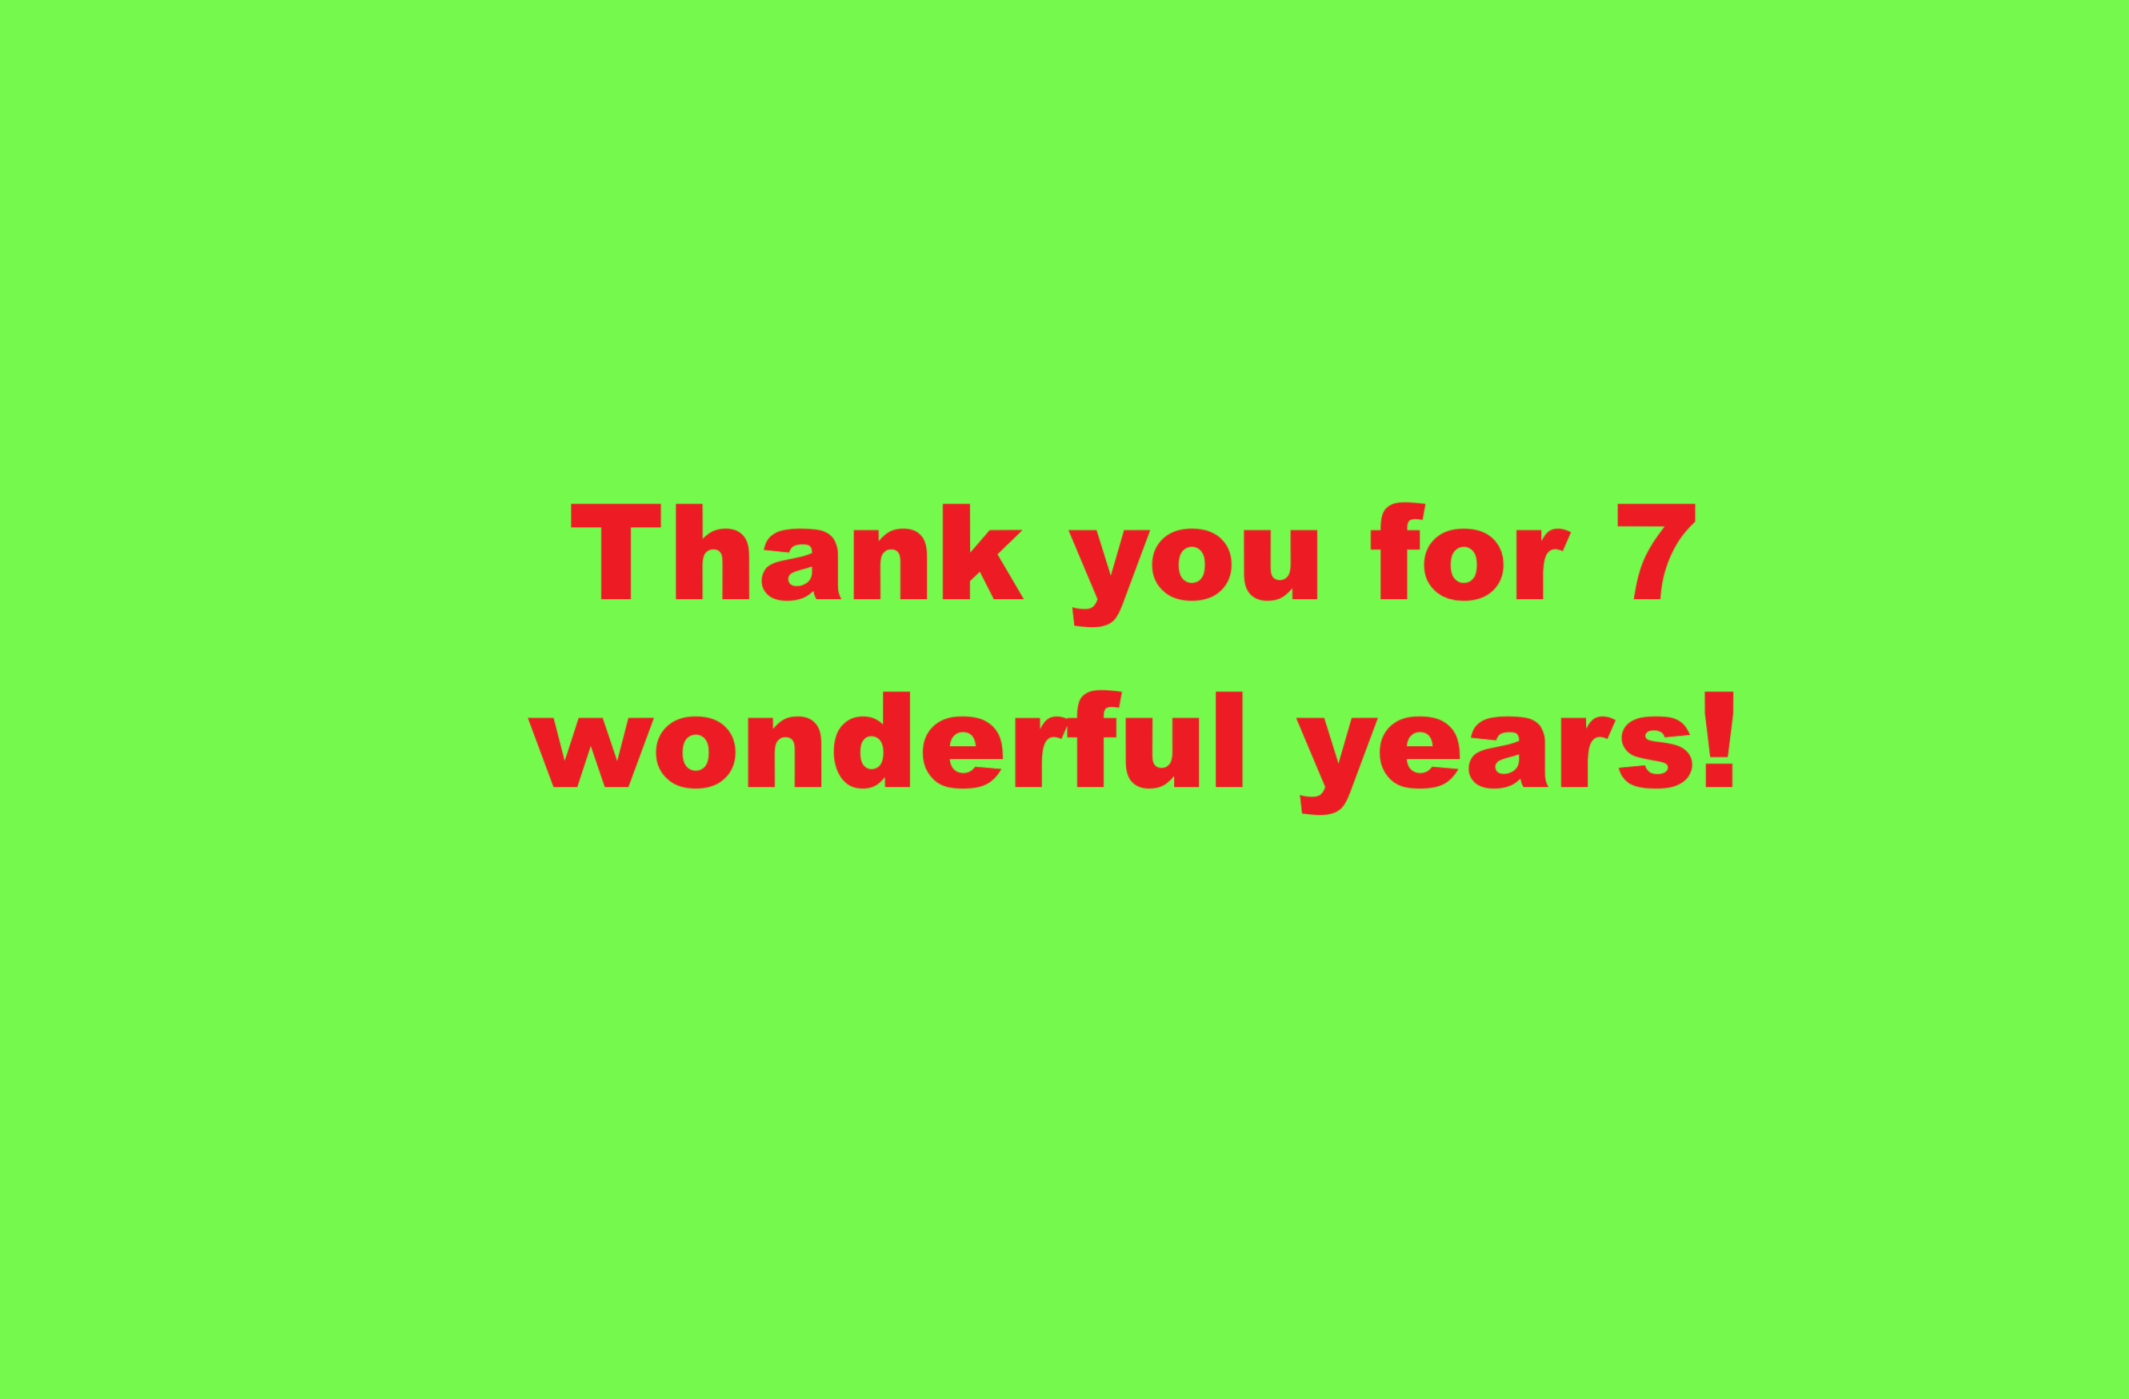

-1

In [13]:
import cv2
from google.colab.patches import cv2_imshow

sevenYearsTestImage = cv2.imread('7 years.png', cv2.IMREAD_COLOR)
cv2_imshow(sevenYearsTestImage)
cv2.waitKey(0)

<h2>Drawing the bounding boxes</h2>

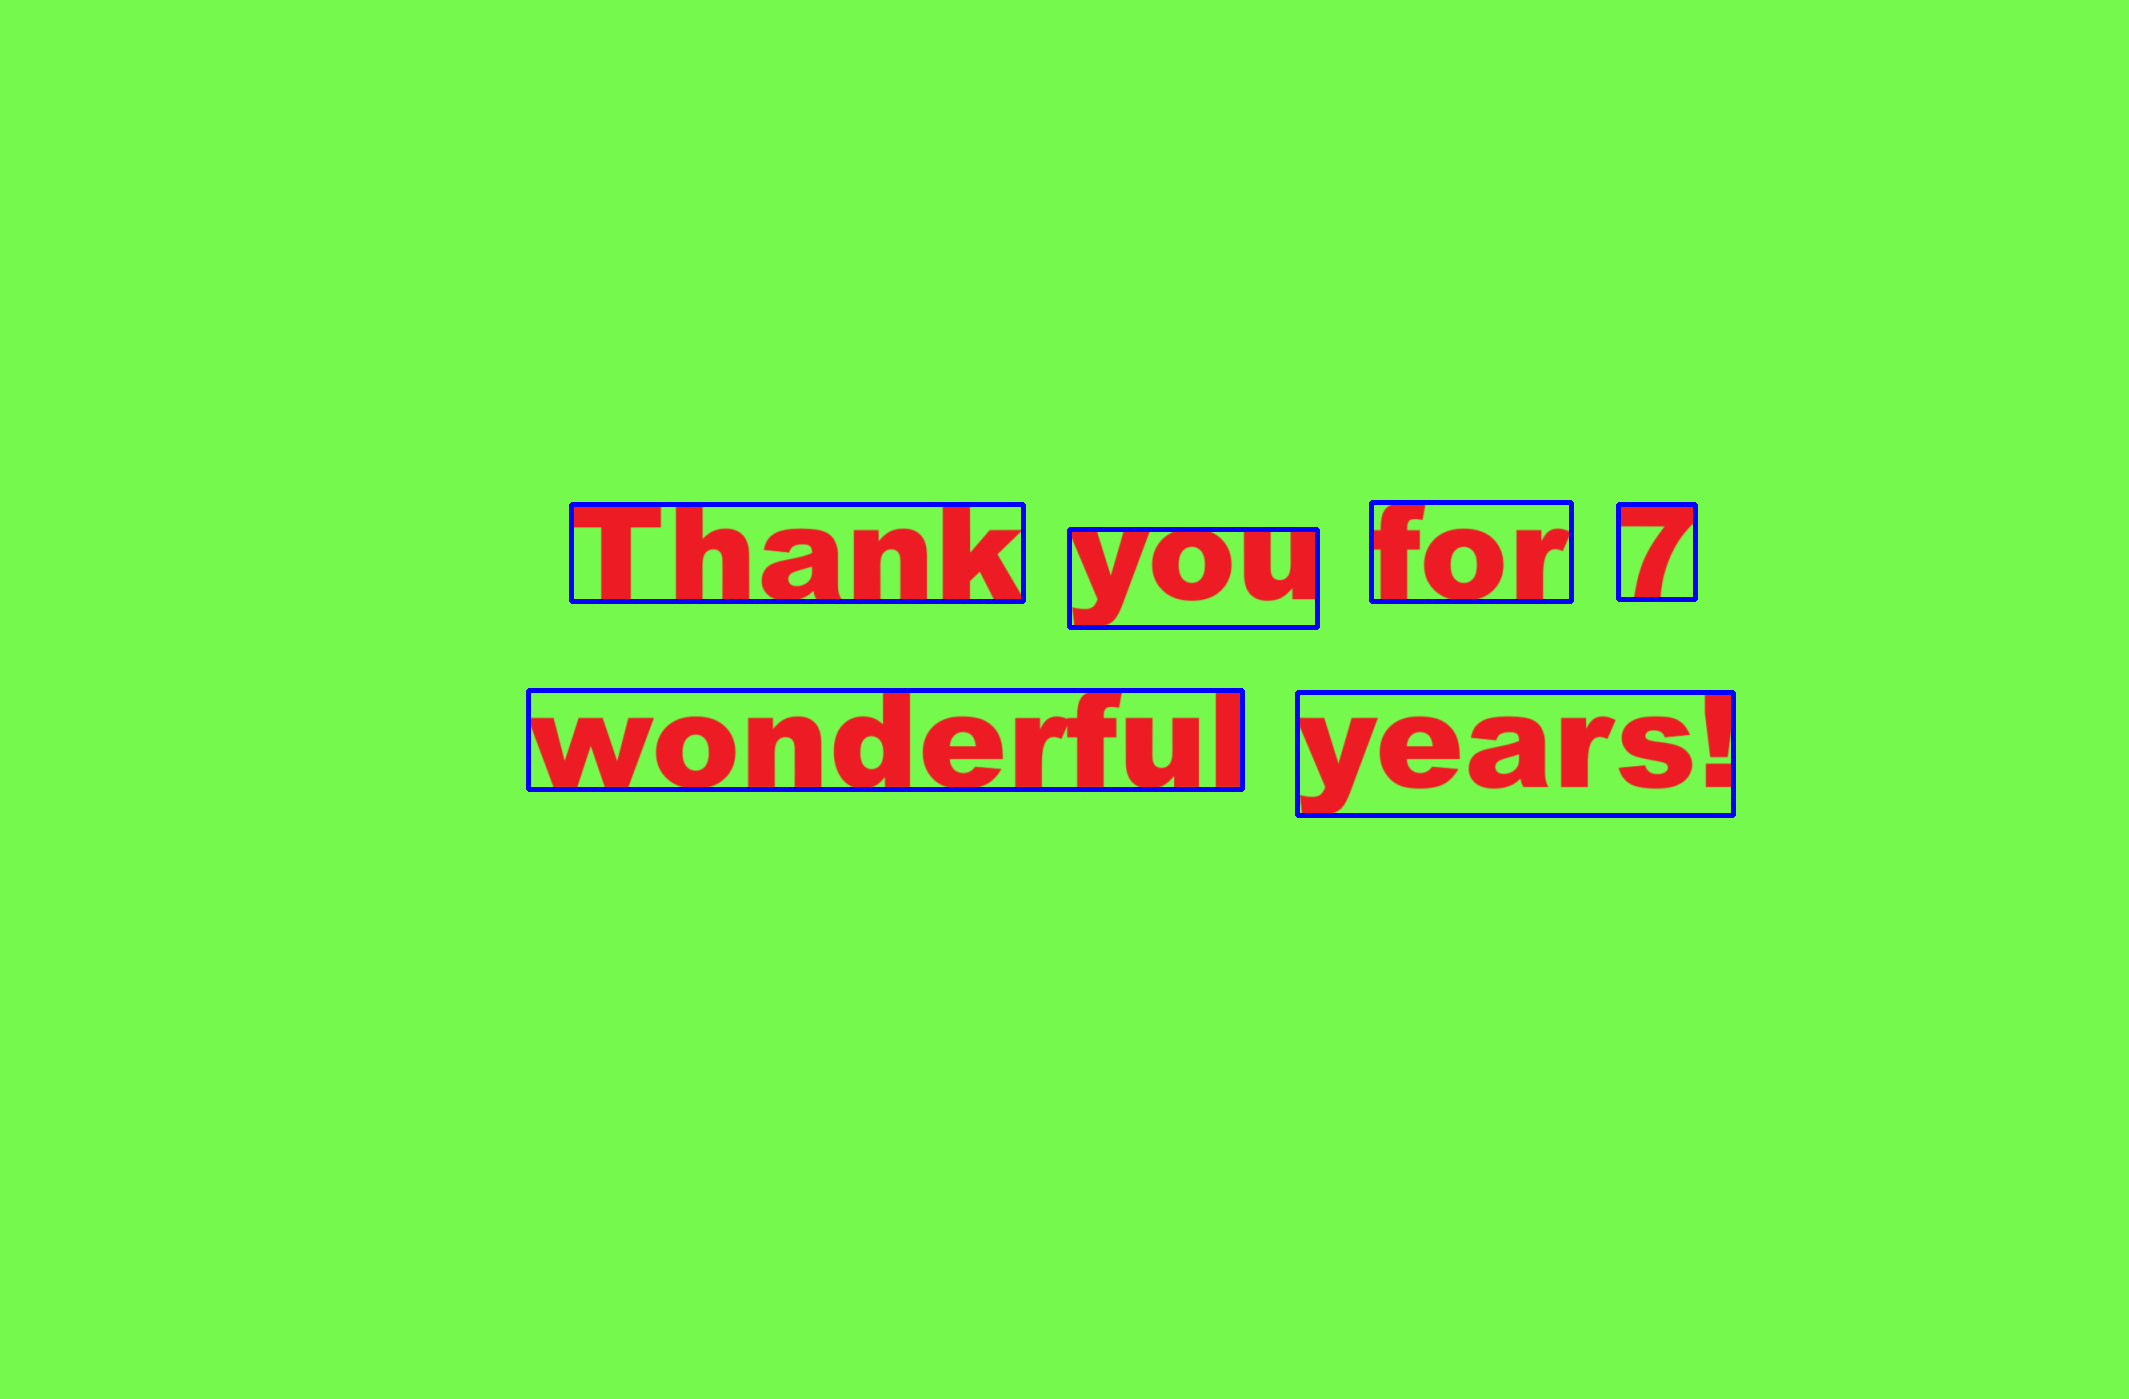

In [18]:
sevenYearsWords = sevenYearsWords.reset_index(drop=True)

howManyBoxes = len(sevenYearsWords['text'])

for h in range(howManyBoxes):
  (x, y, w, h) = (sevenYearsWords['left'][h], sevenYearsWords['top'][h], sevenYearsWords['width'][h], sevenYearsWords['height'][h])
  sevenYearsTestImage = cv2.rectangle(sevenYearsTestImage, (x, y), (x + w, y + h), (255, 0, 0), 3)

cv2_imshow(sevenYearsTestImage)